<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning3/blob/master/notebook/chap13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U transformers[ja] --quiet

# 系列ラベリング

## 例題13.1

Transformers ライブラリを用いて，BERT を用いた固有表現抽出プログラムを作成せよ．

In [ ]:
from transformers import pipeline
from pprint import pprint

ner_pipeline = pipeline("token-classification",
    model="llm-book/bert-base-japanese-v3-ner-wikipedia-dataset",
    aggregation_strategy="simple",  # 複数トークンをまとめる方法
)

In [ ]:
text = "サムは浅葱町でプリウスを見た"
pprint(ner_pipeline(text))

# 系列識別

## 例題13.2

Transformers ライブラリを用いて，BERT を用いた自然言語文のPN判定を行うプログラムを作成せよ．

In [ ]:
clf_pipeline = pipeline("text-classification",
                        model="llm-book/bert-base-japanese-v3-marc_ja")

In [ ]:
text = "その映画は二度と観ることはないだろう"
print(clf_pipeline(text)[0])

# 系列変換

## 例題13.3

Transformers ライブラリを用いて，GPT を用いた対話的な応答生成を行うプログラムを作成せよ．

In [ ]:
gen_pipeline = pipeline("text-generation",
                        model="rinna/japanese-gpt2-xsmall")

In [ ]:
text = "曇の日の遊びのおすすめは？"
print(gen_pipeline(text)[0])

# 時系列信号の予測

時系列機械学習用ライブラリ[sktime](https://github.com/sktime/sktime) (バージョン 0.40.1)（dask==2025.9.1）を使って、時系列信号の予測を行います。

エラーが出る場合は、以下のライブラリのインストールのあと、ランタイムを再起動します

In [1]:
!pip install -U sktime[forecasting]==0.40.1 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.3/976.3 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.9/974.9 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.7/424.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.6/354.6 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


データセットとして、Airline Passengers を使います。これは、1949年から1960年までの月ごとの飛行機の乗客数データです。

In [2]:
import numpy as np
import pandas as pd
import tqdm
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA

In [3]:
y = load_airline()
y

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


時系列の線グラフで表示してわかるように、季節変動を伴いながら全体として乗客数は増えています。このデータから直近36ヶ月のデータをテストデータ、それ以前のデータを学習データとして予測問題を設定します。

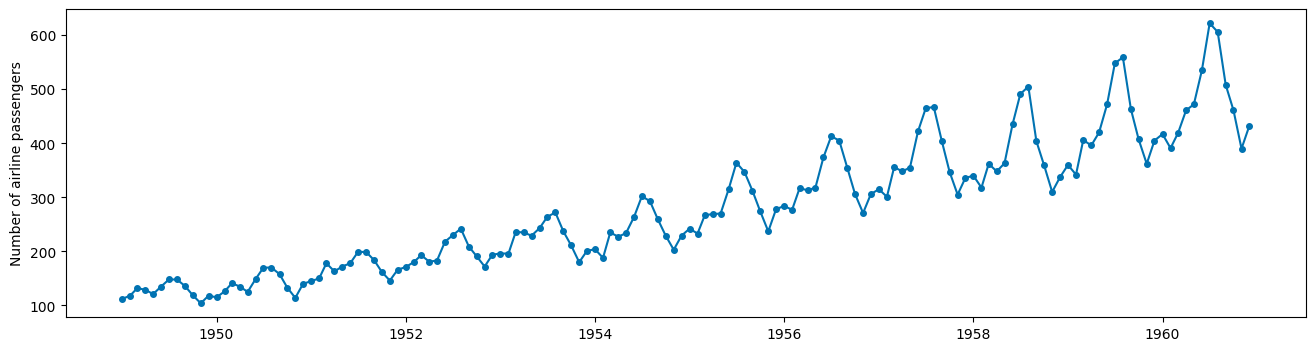

In [4]:
fig, ax = plot_series(y)
fig.savefig('s.svg', format='svg', bbox_inches='tight')

In [5]:
y_train, y_test = temporal_train_test_split(y,test_size=36)

sktimeのplot_seriesでは複数の系列データを異なる色で表示する機能もあります。

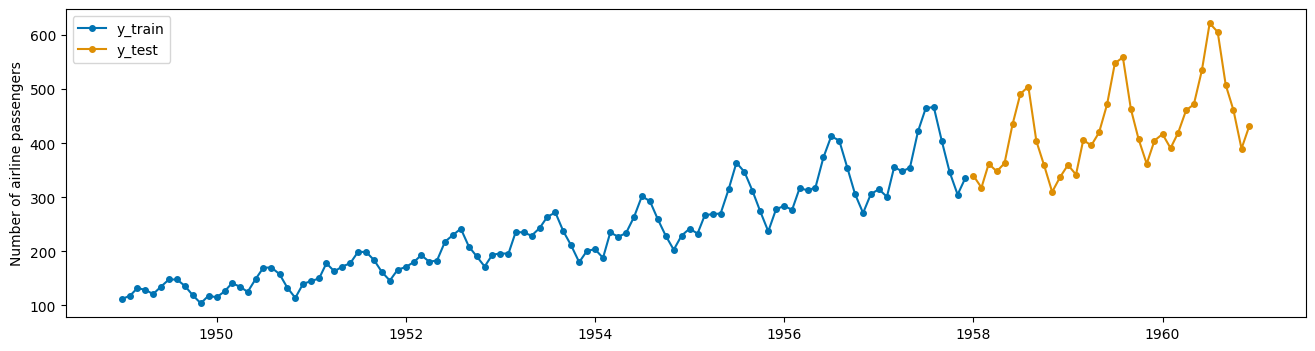

In [6]:
fig, ax = plot_series(y_train, y_test, labels=["y_train", "y_test"])
fig.savefig('s.svg', format='svg', bbox_inches='tight')

周期を表すパラメータspを1年の月数である12にしてAutoARIMAのインスタンスを作成し、学習させます

In [7]:
forecaster = StatsForecastAutoARIMA(sp=12)
forecaster.fit(y_train)

StatsForecastAutoARIMA(sp=12)

テストデータと同じ系列長だけ予測をさせます。

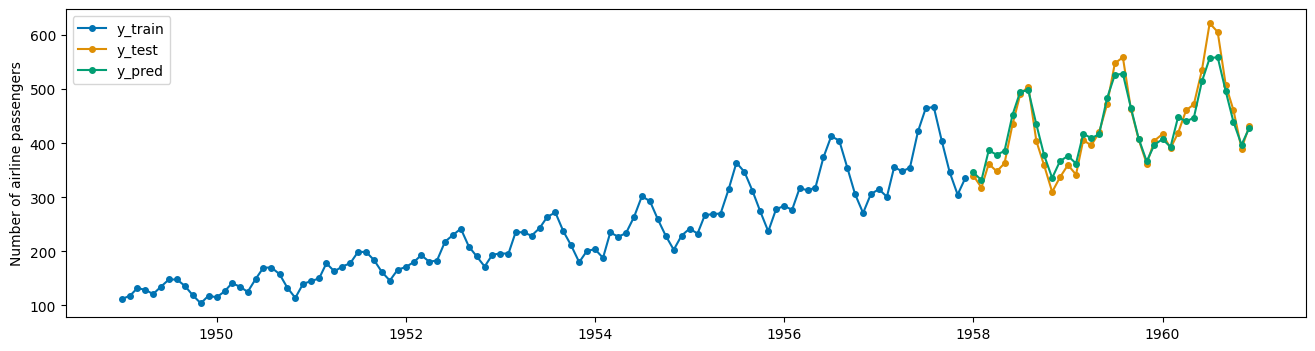

In [8]:
y_pred = forecaster.predict(list(range(1, len(y_test)+1)))
fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
fig.savefig('s.svg', format='svg', bbox_inches='tight')

## 演習問題

13.1 Transformers ライブラリを用いて，日英の翻訳を行うプログラムを作成せよ．

In [9]:
from transformers import pipeline
from pprint import pprint

translate_pipeline = pipeline("translation", model="Helsinki-NLP/opus-mt-ja-en")
translate_pipeline("長い文の翻訳は苦手です。")[0]['translation_text']

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/303M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/303M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/782k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


"I'm not good at translating long sentences."